In [1]:
import yfinance as yf
import pandas as pd

# Download historical stock data for Apple (AAPL)
stock_data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')

# Display the first few rows
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2015-01-02 00:00:00+00:00  24.373957  27.332500  27.860001  26.837500   
2015-01-05 00:00:00+00:00  23.687305  26.562500  27.162500  26.352501   
2015-01-06 00:00:00+00:00  23.689535  26.565001  26.857500  26.157499   
2015-01-07 00:00:00+00:00  24.021715  26.937500  27.049999  26.674999   
2015-01-08 00:00:00+00:00  24.944681  27.972500  28.037500  27.174999   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2015-01-02 00:00:00+00:00  27.847500  212818400  
2015-01-05 00:00:00+00:00  27.072500  257142000  
2015-01-06 00:00:00+00:00  26.635000  263188400  
2015-01-07 00:00:00+00:00  26.799999  160423600  
2015-01-08 00:00:00+00:00  27.307501  237458000  


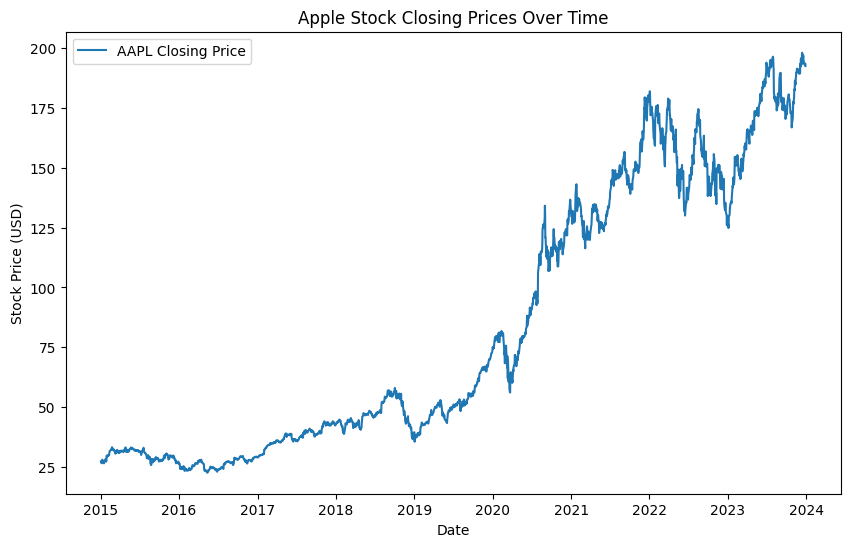

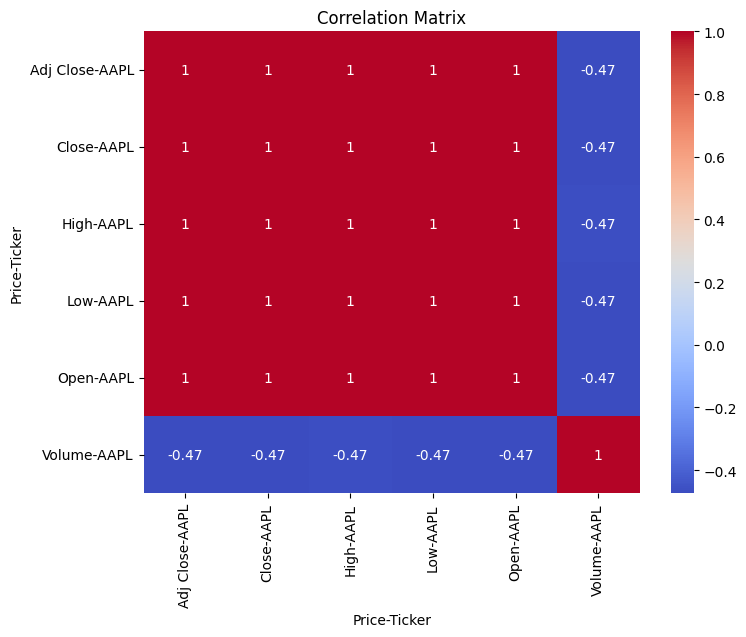

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='AAPL Closing Price')
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Show correlation matrix for the stock's variables
plt.figure(figsize=(8, 6))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


ADF Statistic: 0.1914154990195427
p-value: 0.9717759844359734


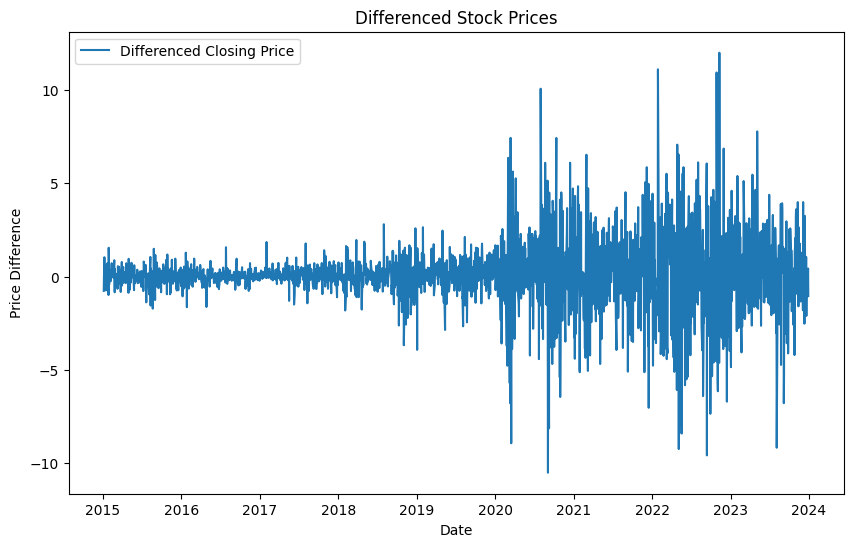

In [3]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity using Augmented Dickey-Fuller test
def check_stationarity(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    return result[1]

# Check if 'Close' prices are stationary
p_value = check_stationarity(stock_data['Close'])

# If p-value > 0.05, we need to difference the data to make it stationary
if p_value > 0.05:
    stock_data['Close_diff'] = stock_data['Close'].diff().dropna()
else:
    stock_data['Close_diff'] = stock_data['Close']
    
# Plot the differenced data if needed
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close_diff'], label='Differenced Closing Price')
plt.title('Differenced Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.show()


In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Use ARIMA model to fit the data
model = ARIMA(stock_data['Close_diff'].dropna(), order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Predict future stock prices
predictions = model_fit.forecast(steps=30)  # Forecast for the next 30 days
print(predictions)


C:\Users\ARUNACHALAM C\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ARUNACHALAM C\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ARUNACHALAM C\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 2263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4571.077
Date:                Mon, 21 Oct 2024   AIC                           9148.154
Time:                        19:56:16   BIC                           9165.326
Sample:                             0   HQIC                          9154.420
                               - 2263                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0376      0.013     -2.977      0.003      -0.062      -0.013
ma.L1         -1.0000      0.034    -29.305      0.000      -1.067      -0.933
sigma2         3.3212      0.124     26.727      0.0

C:\Users\ARUNACHALAM C\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ARUNACHALAM C\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


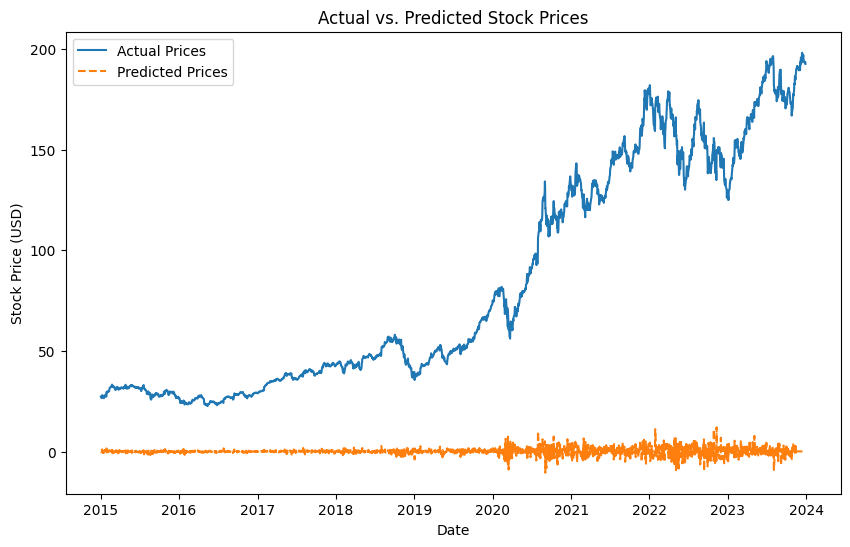

Mean Squared Error: 37207.43587012658


In [5]:
# Adding predictions to the dataframe
predicted_stock_prices = stock_data['Close_diff'].copy()
predicted_stock_prices[-30:] = predictions

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Actual Prices')
plt.plot(predicted_stock_prices, label='Predicted Prices', linestyle='--')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(stock_data['Close'][-30:], predicted_stock_prices[-30:])
print(f'Mean Squared Error: {mse}')
